<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 105.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 98.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 125.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 114.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 9.6 MB/s eta 0:00:00
   ━━━

#### Step 1: Load the dataset


In [6]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


In [9]:
#sql="Select *,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')/1.0 as min_age,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)')/1.0 as max_age, (REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')+REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)'))/2.0 as Age_Numeric from main "
#df=pd.read_sql_query(sql, conn)

#print(df)
#print(df['Age'][(df['max_age']>=30) & (df['max_age']<=35)].unique())

  # Time mapping
time_categories = {
        'Less than 15 minutes a day': 1,
        '15-30 minutes a day': 2,
        '30-60 minutes a day': 3,
        '60-120 minutes a day': 4,
        'Over 120 minutes a day': 5
    }

age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 29.5,
        '35-44 years old': 39.5,
        '45-54 years old': 49.5,
        '55-64 years old': 59.5,
        '65 years or older': 70,
        'Prefer not to say': None
    }
    
    # Create new column with mapped values
df['Age_Numeric'] = df['Age'].map(age_mapping)
    
# Convert time data
df['TimeSearching_Num'] = df['TimeSearching'].map(time_categories)
df['TimeAnswering_Num'] = df['TimeAnswering'].map(time_categories)
df['Frustration_Count'] = df['Frustration'].str.count(';') + 1
df['CompTotal'].fillna(df['CompTotal'].median(), inplace=True)
df['JobSatPoints_6'].fillna(df['JobSatPoints_6'].median(), inplace=True)

/tmp/ipykernel_83/1893945940.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompTotal'].fillna(df['CompTotal'].median(), inplace=True)
/tmp/ipykernel_83/1893945940.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [21]:
def create_scatter_plots(df):
    """
    Creates comprehensive scatter plot visualizations
    """
    # 1. Age vs Job Satisfaction
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Age_Numeric', y='JobSatPoints_6', alpha=0.6)
    plt.title('Age vs Job Satisfaction')
    plt.xlabel('Age')
    plt.ylabel('Job Satisfaction Score')
    plt.tight_layout()

    # 2. Compensation vs Job Satisfaction
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='CompTotal', y='JobSatPoints_6', alpha=0.6)
    plt.title('Compensation vs Job Satisfaction')
    plt.xlabel('Total Compensation')
    plt.ylabel('Job Satisfaction Score')
    plt.tight_layout()

    # 3. Age vs Job Satisfaction with Trend
    plt.figure(figsize=(12, 6))
    sns.regplot(data=df, x='Age_Numeric', y='JobSatPoints_6', scatter_kws={'alpha':0.5})
    plt.title('Age vs Job Satisfaction (with Trend)')
    plt.xlabel('Age')
    plt.ylabel('Job Satisfaction Score')
    plt.tight_layout()

    # 4. Age vs Work Experience
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='Age_Numeric', y='YearsCodePro', alpha=0.6)
    plt.title('Age vs Work Experience')
    plt.xlabel('Age')
    plt.ylabel('Years of Professional Experience')
    plt.tight_layout()

    # 5. Bubble Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(df['CompTotal'], df['JobSatPoints_6'], 
               s=df['Age_Numeric']*10, alpha=0.5)
    plt.title('Compensation vs Job Satisfaction (Size: Age)')
    plt.xlabel('Total Compensation')
    plt.ylabel('Job Satisfaction Score')
    plt.tight_layout()

    # 6. Programming Languages vs Job Satisfaction
    plt.figure(figsize=(12, 6))
    lang_data = df['LanguageWantToWorkWith'].str.split(';').explode()
    top_langs = lang_data.value_counts().head(10).index
    lang_df = df[df['LanguageWantToWorkWith'].isin(top_langs)]
    sns.scatterplot(data=lang_df, x='LanguageWantToWorkWith', 
                    y='JobSatPoints_6', alpha=0.6)
    plt.xticks(rotation=45)
    plt.title('Programming Languages vs Job Satisfaction')
    plt.tight_layout()

    # 7. Compensation vs Job Satisfaction by Employment
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='CompTotal', y='JobSatPoints_6', 
                    hue='Employment', alpha=0.6)
    plt.title('Compensation vs Job Satisfaction by Employment Type')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

    # 8. Experience vs Age by Country
    plt.figure(figsize=(12, 6))
    top_countries = df['Country'].value_counts().head(5).index
    country_df = df[df['Country'].isin(top_countries)]
    sns.scatterplot(data=country_df, x='Age_Numeric', y='YearsCodePro', 
                    hue='Country', alpha=0.6)
    plt.title('Work Experience vs Age by Country')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

# Execute visualization
#scatter_analysis = create_scatter_plots(df)


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




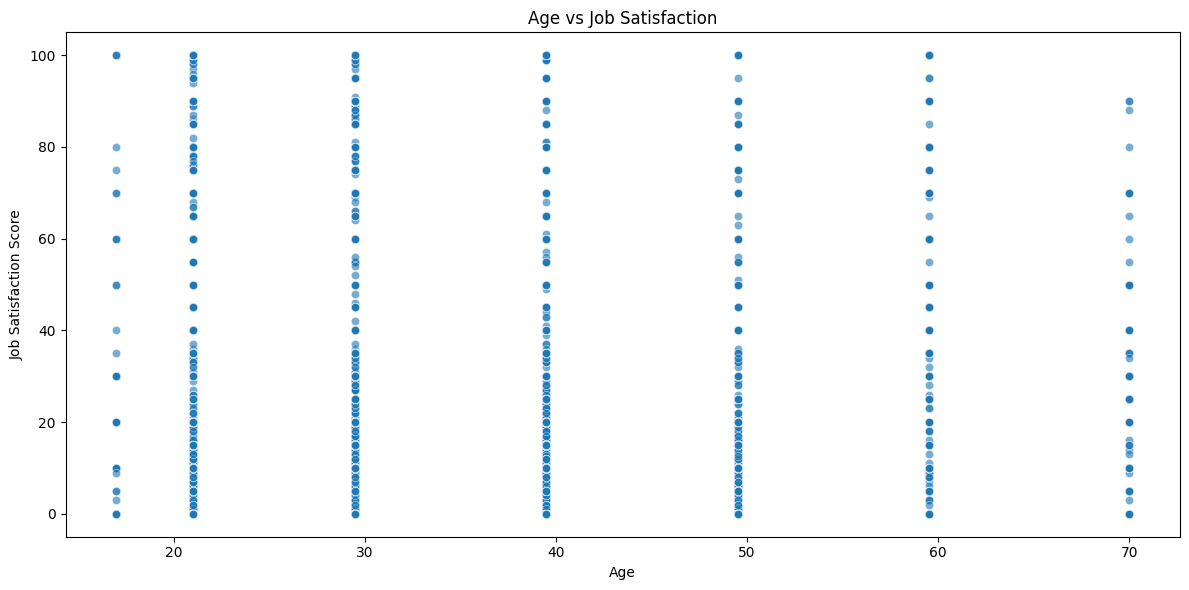

In [22]:
## Write your code here
    # 1. Age vs Job Satisfaction
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age_Numeric', y='JobSatPoints_6', alpha=0.6)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


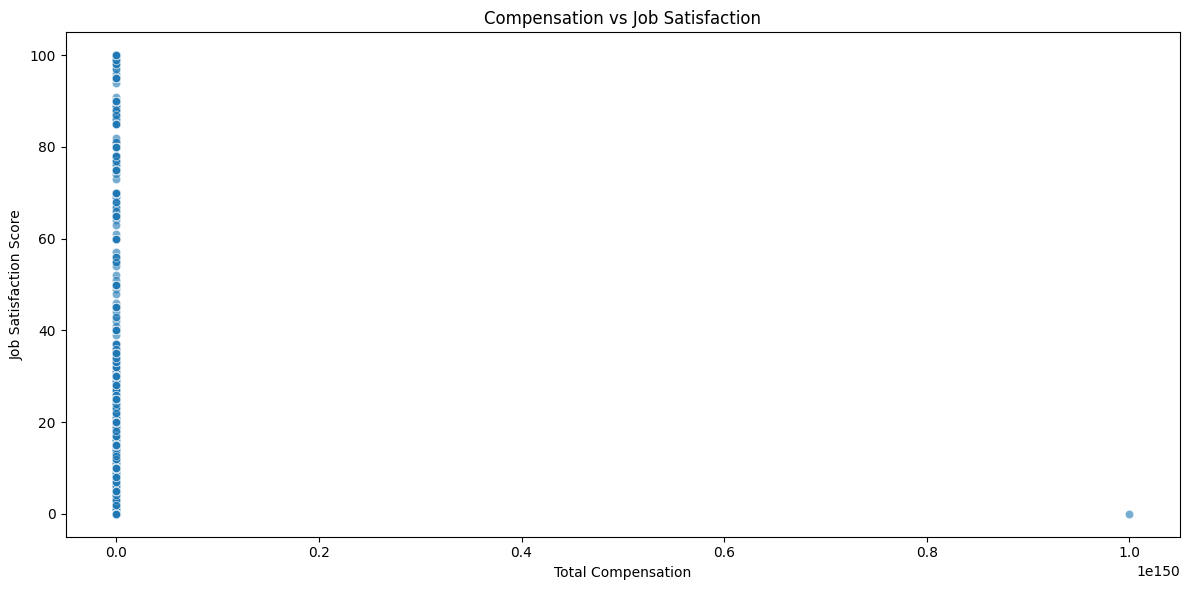

In [23]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CompTotal', y='JobSatPoints_6', alpha=0.6)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


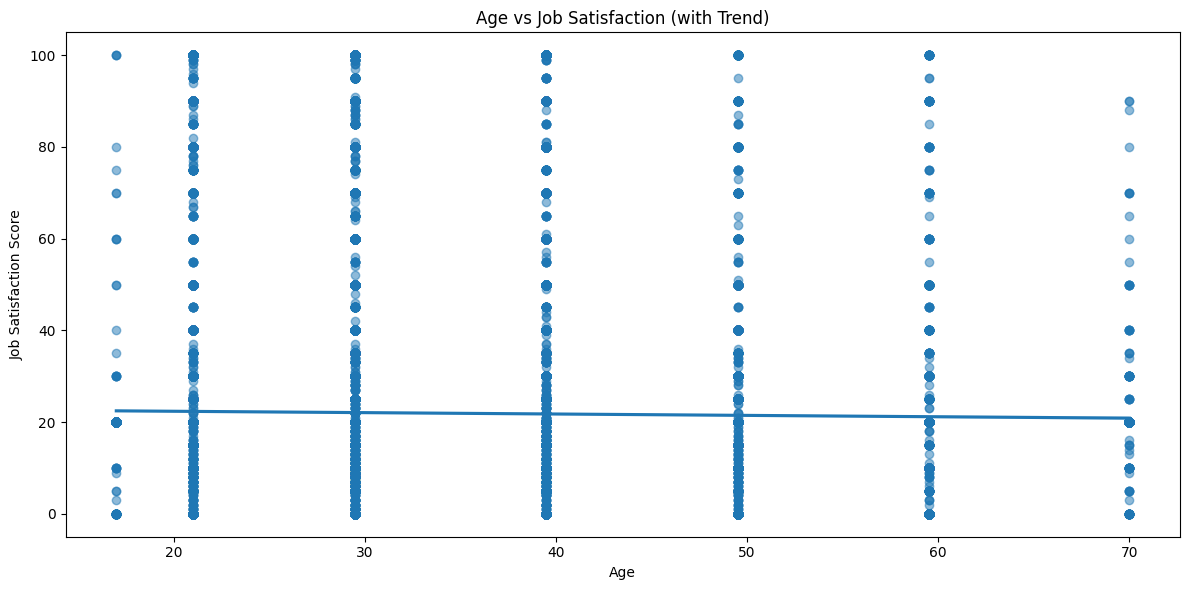

In [24]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Age_Numeric', y='JobSatPoints_6', scatter_kws={'alpha':0.5})
plt.title('Age vs Job Satisfaction (with Trend)')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


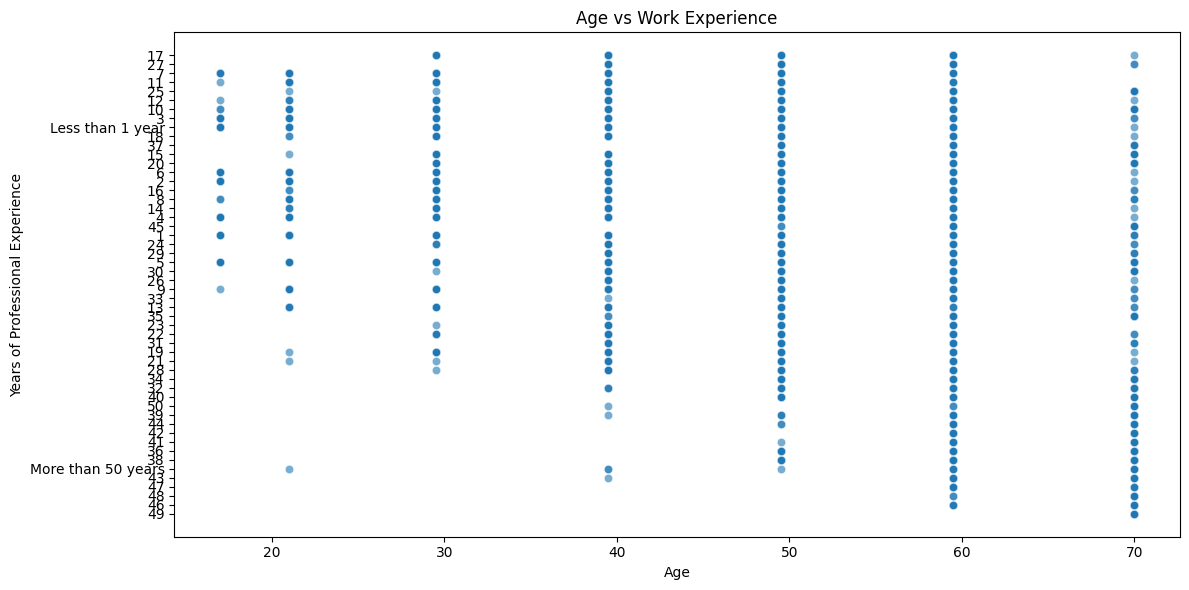

In [25]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age_Numeric', y='YearsCodePro', alpha=0.6)
plt.title('Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Experience')
plt.tight_layout()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


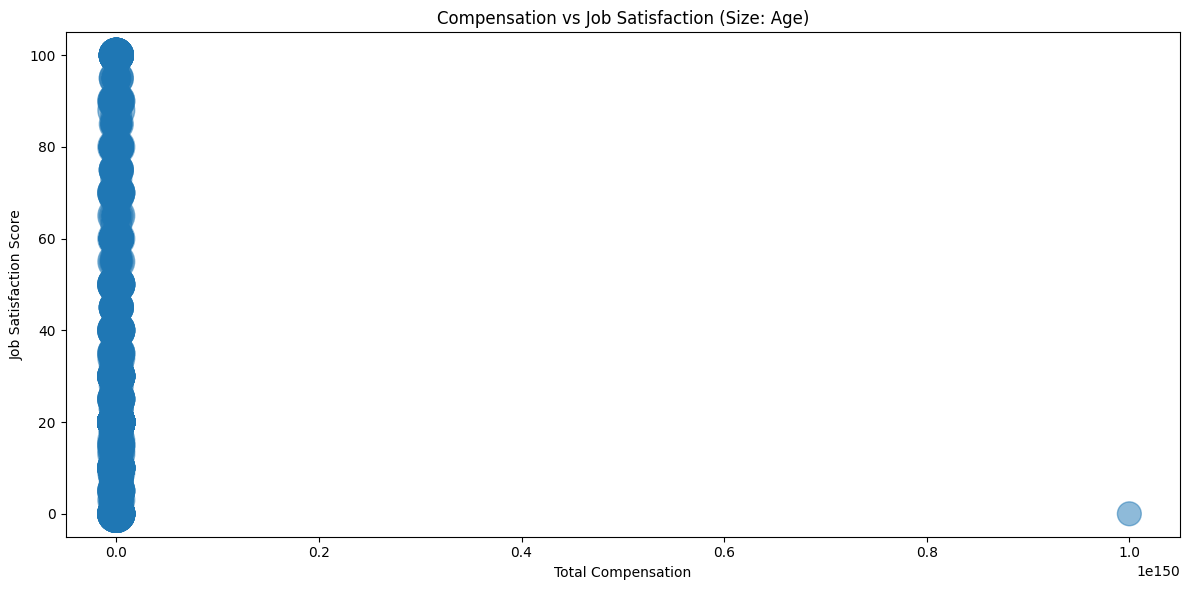

In [26]:
## Write your code here
plt.figure(figsize=(12, 6))
plt.scatter(df['CompTotal'], df['JobSatPoints_6'], s=df['Age_Numeric']*10, alpha=0.5)
plt.title('Compensation vs Job Satisfaction (Size: Age)')
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction Score')
plt.tight_layout()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


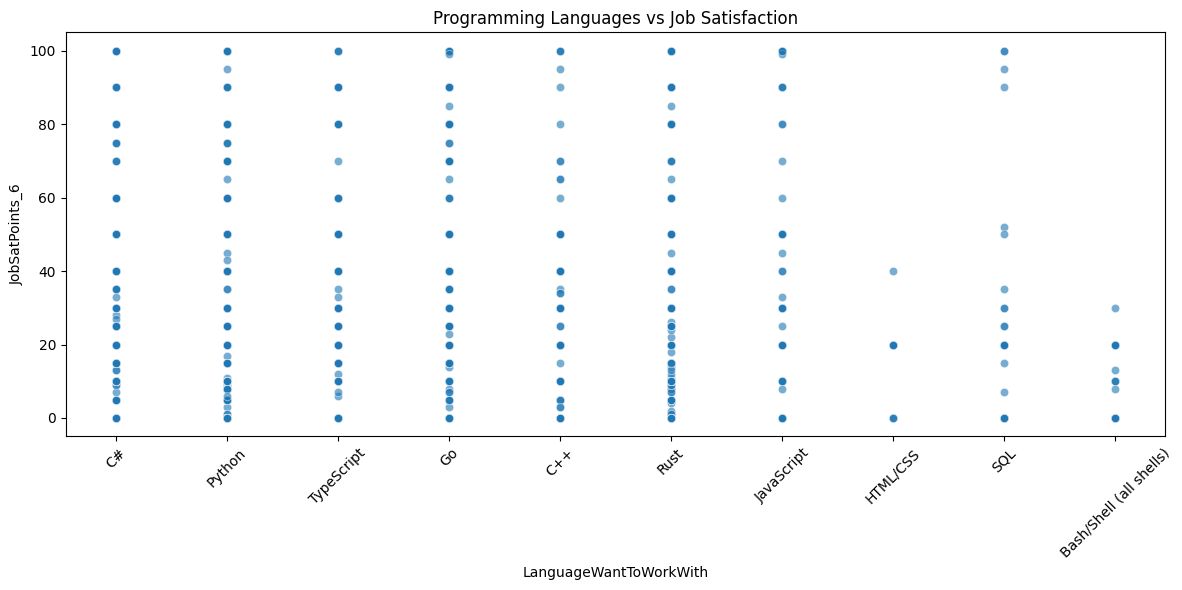

In [27]:
## Write your code here
plt.figure(figsize=(12, 6))
lang_data = df['LanguageWantToWorkWith'].str.split(';').explode()
top_langs = lang_data.value_counts().head(10).index
lang_df = df[df['LanguageWantToWorkWith'].isin(top_langs)]
sns.scatterplot(data=lang_df, x='LanguageWantToWorkWith', y='JobSatPoints_6', alpha=0.6)
plt.xticks(rotation=45)
plt.title('Programming Languages vs Job Satisfaction')
plt.tight_layout()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_83/2762685682.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


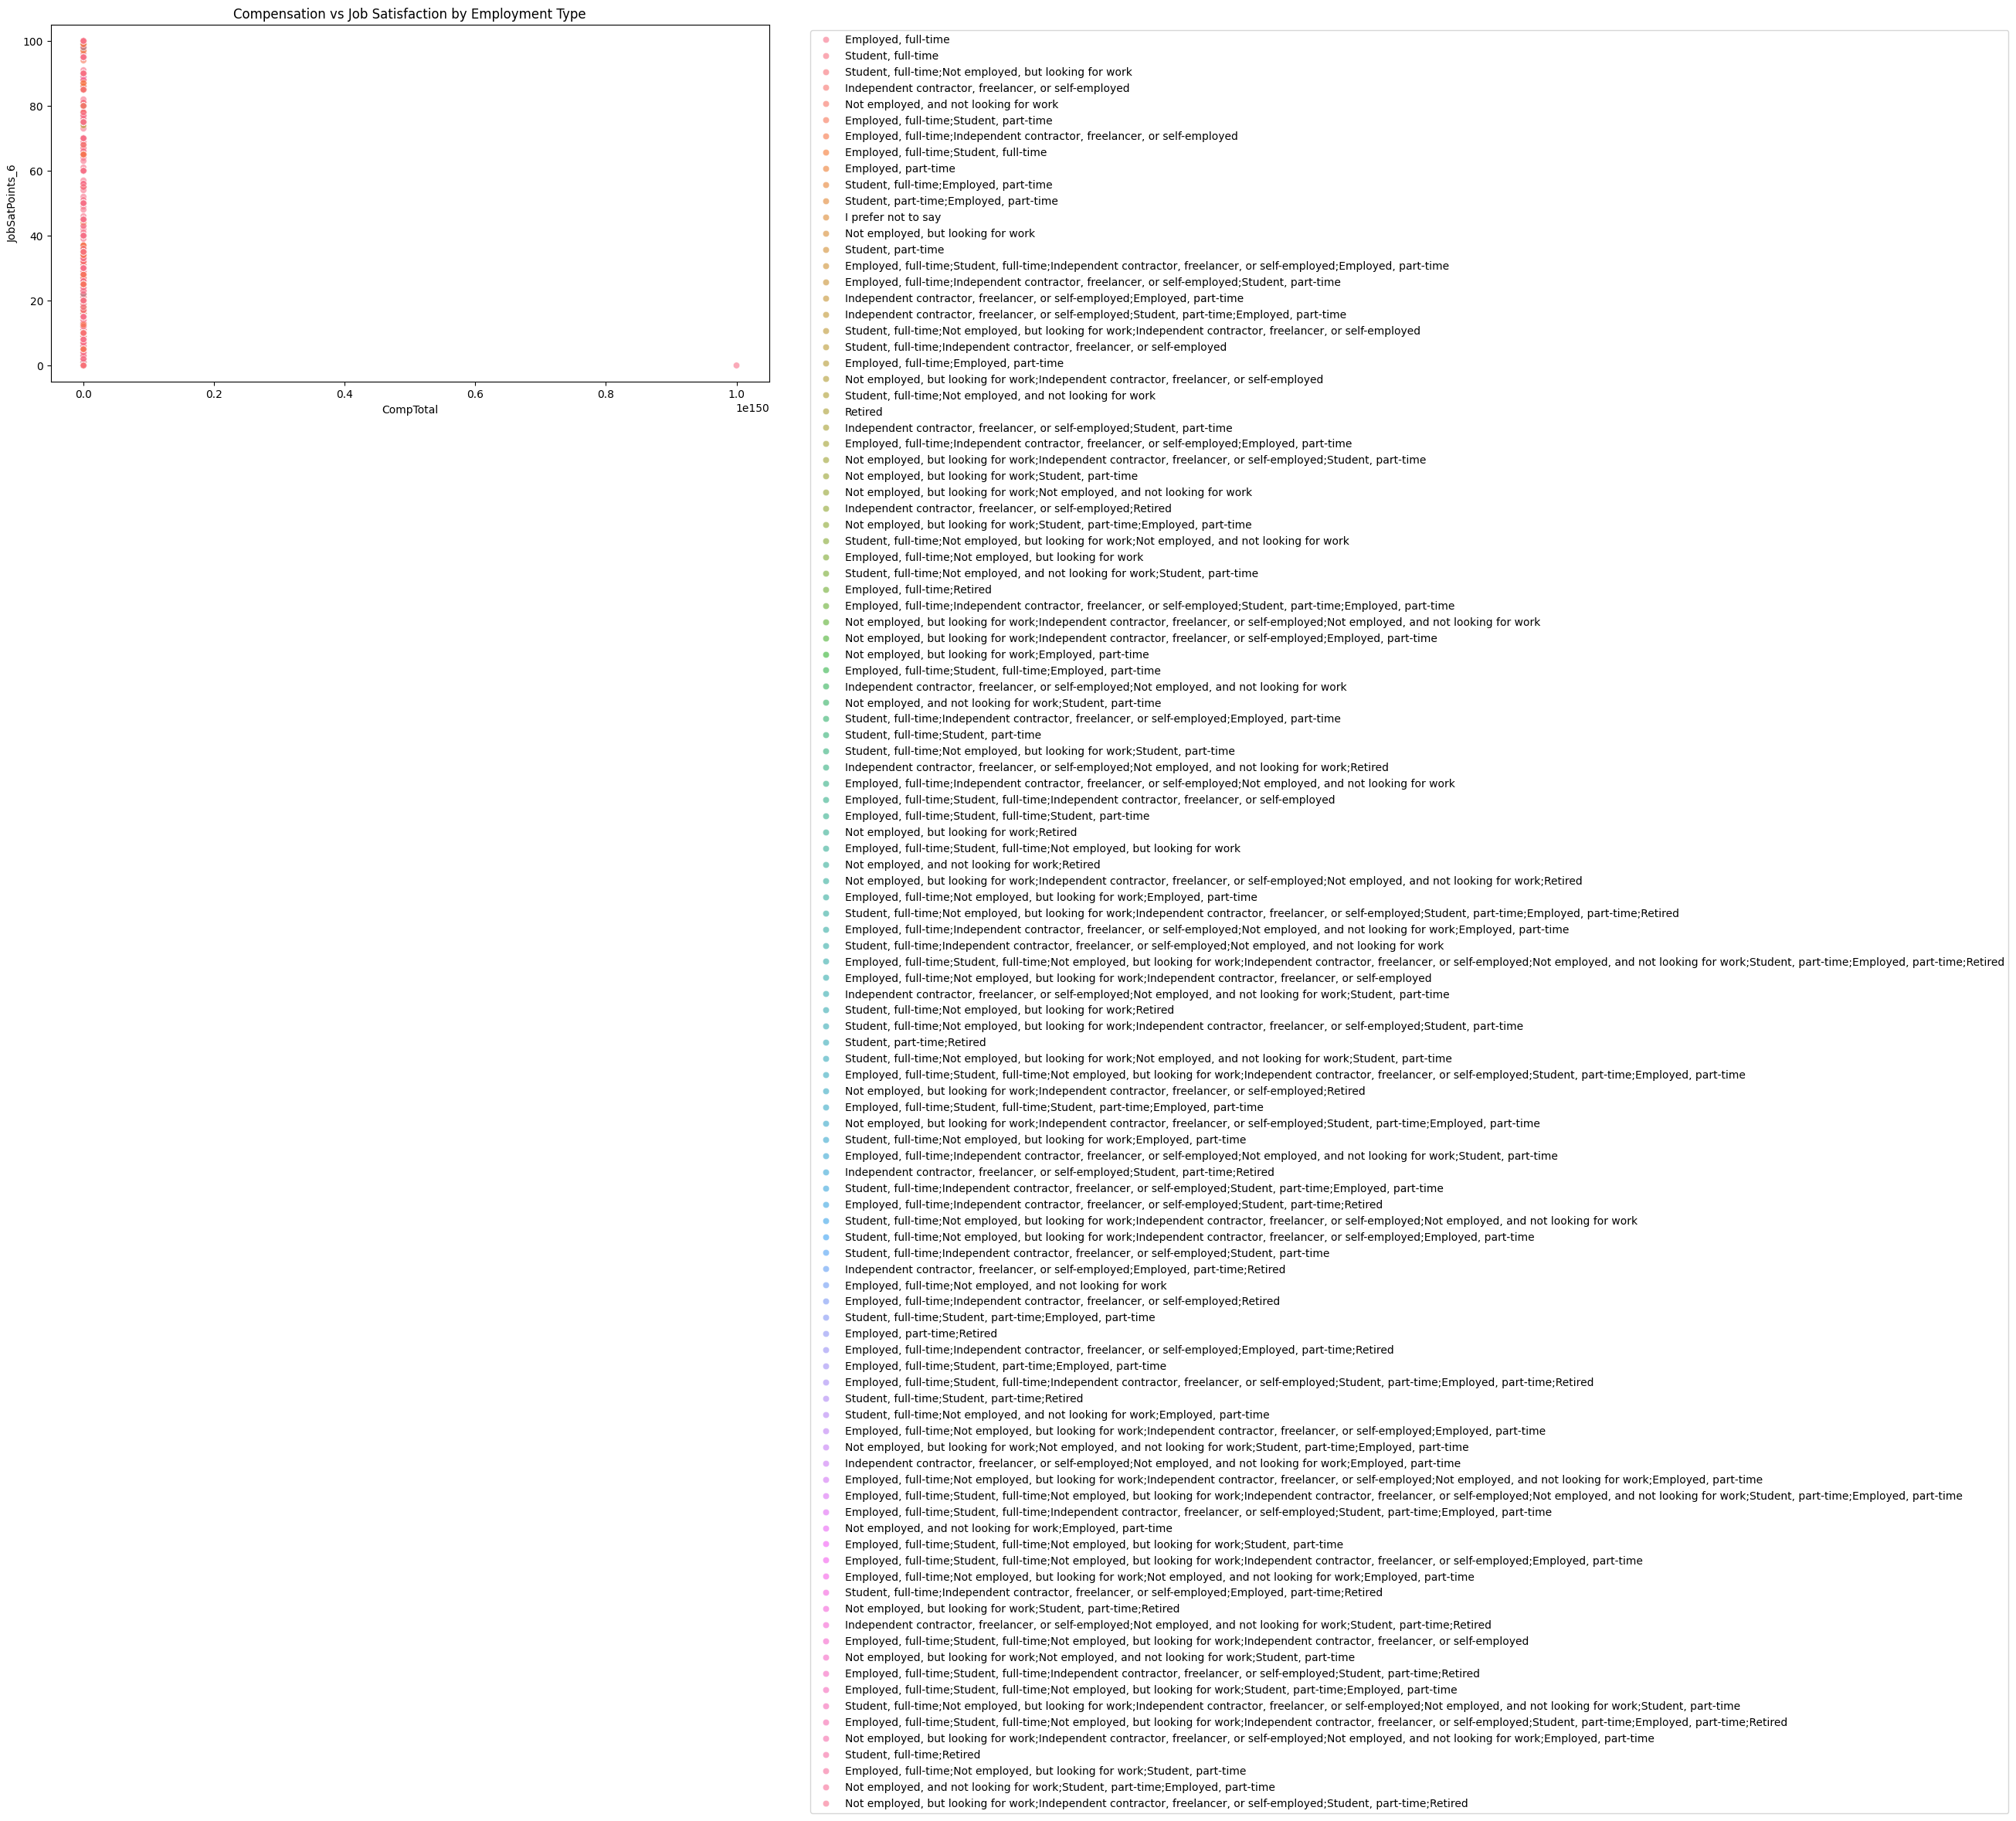

In [28]:
## Write your code here
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='CompTotal', y='JobSatPoints_6', hue='Employment', alpha=0.6)
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


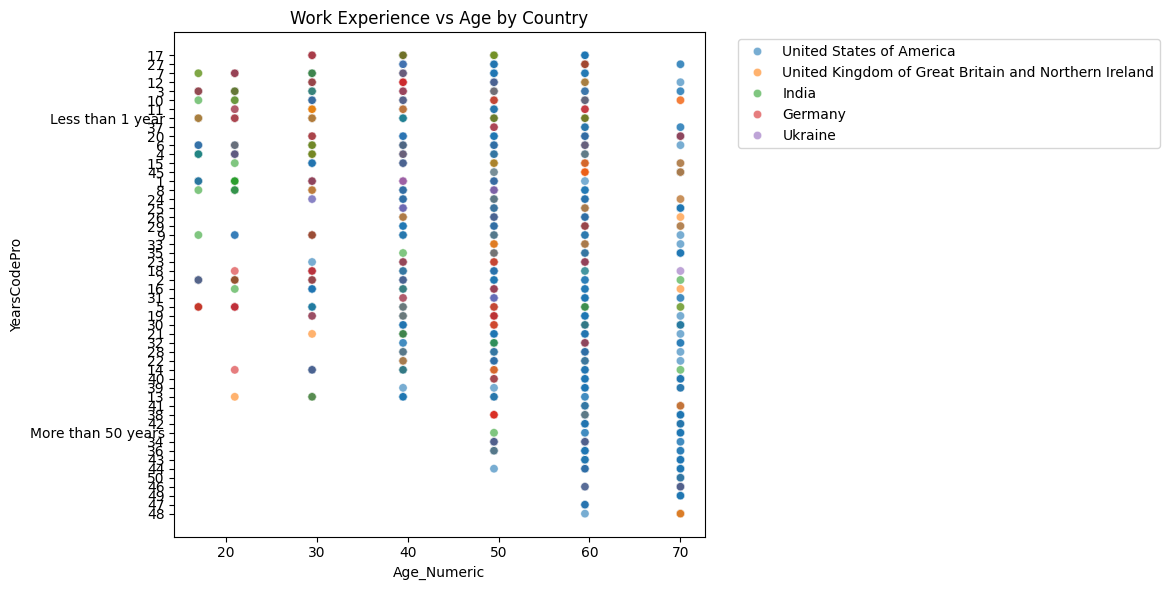

In [29]:
## Write your code here
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().head(5).index
country_df = df[df['Country'].isin(top_countries)]
sns.scatterplot(data=country_df, x='Age_Numeric', y='YearsCodePro', hue='Country', alpha=0.6)
plt.title('Work Experience vs Age by Country')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
